In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import statsmodels as sm
%matplotlib inline

C:\Users\mdsai\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! wget https://raw.githubusercontent.com/Md-Saiful-Alam/Data/master/Hdma.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
data = pd.read_csv('Hdma.csv')
data.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [0]:
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [0]:
profile.to_notebook_iframe()

In [10]:
from pycaret.classification import *
clf1 = setup(data = data, target = 'deny', session_id = 123, categorical_features = ['ccs', 'mcs'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(2381, 13)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.906400,0.803700,0.396600,0.705500,0.498300,0.451900
1,Extreme Gradient Boosting,0.905800,0.816400,0.346100,0.721600,0.460300,0.416900
2,CatBoost Classifier,0.905200,0.817500,0.336300,0.726300,0.451100,0.408100
3,Logistic Regression,0.902200,0.817600,0.276100,0.791200,0.393800,0.355000
4,Linear Discriminant Analysis,0.901600,0.816900,0.346600,0.731200,0.454600,0.408300
5,Gradient Boosting Classifier,0.901000,0.812800,0.361100,0.663600,0.460000,0.411600
6,Ridge Classifier,0.900900,0.000000,0.235800,0.807500,0.351200,0.316800
7,Extra Trees Classifier,0.897400,0.808200,0.326600,0.639500,0.423500,0.375400
8,Ada Boost Classifier,0.896800,0.774200,0.336100,0.637700,0.434900,0.384500
9,Random Forest Classifier,0.894400,0.808400,0.281600,0.658000,0.386100,0.338500


In [13]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8802,0.0,0.1000,0.5000,0.1667,0.1320
1,0.9162,0.0,0.3000,1.0000,0.4615,0.4300
2,0.9042,0.0,0.4000,0.6667,0.5000,0.4507
3,0.9042,0.0,0.3500,0.7000,0.4667,0.4204
4,0.9162,0.0,0.3500,0.8750,0.5000,0.4633
5,0.9042,0.0,0.2500,0.8333,0.3846,0.3486
6,0.8976,0.0,0.1579,0.7500,0.2609,0.2302
7,0.8916,0.0,0.1500,0.7500,0.2500,0.2186
8,0.8976,0.0,0.1500,1.0000,0.2609,0.2369
9,0.8976,0.0,0.1500,1.0000,0.2609,0.2369


In [14]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8743,0.6510,0.2500,0.4545,0.3226,0.2597
1,0.9042,0.7776,0.5000,0.6250,0.5556,0.5026
2,0.9102,0.7939,0.5500,0.6471,0.5946,0.5445
3,0.9042,0.7612,0.4000,0.6667,0.5000,0.4507
4,0.9222,0.8568,0.4500,0.8182,0.5806,0.5417
5,0.8862,0.8010,0.3500,0.5385,0.4242,0.3643
6,0.9096,0.8554,0.3158,0.7500,0.4444,0.4040
7,0.9217,0.8548,0.4000,0.8889,0.5517,0.5155
8,0.9277,0.9003,0.5000,0.8333,0.6250,0.5877
9,0.9036,0.7853,0.2500,0.8333,0.3846,0.3484


In [15]:
tuned_ridge = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8802,0.0,0.1000,0.5000,0.1667,0.1320
1,0.9162,0.0,0.3000,1.0000,0.4615,0.4300
2,0.9042,0.0,0.4000,0.6667,0.5000,0.4507
3,0.9042,0.0,0.3500,0.7000,0.4667,0.4204
4,0.9162,0.0,0.3500,0.8750,0.5000,0.4633
5,0.9042,0.0,0.2500,0.8333,0.3846,0.3486
6,0.8976,0.0,0.1579,0.7500,0.2609,0.2302
7,0.8916,0.0,0.1500,0.7500,0.2500,0.2186
8,0.8976,0.0,0.1500,1.0000,0.2609,0.2369
9,0.8976,0.0,0.1500,1.0000,0.2609,0.2369


In [16]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8623,0.6963,0.1500,0.3333,0.2069,0.1432
1,0.9162,0.8289,0.5000,0.7143,0.5882,0.5432
2,0.9162,0.8415,0.5000,0.7143,0.5882,0.5432
3,0.8862,0.7286,0.2500,0.5556,0.3448,0.2922
4,0.9162,0.8568,0.4000,0.8000,0.5333,0.4928
5,0.9042,0.8364,0.3500,0.7000,0.4667,0.4204
6,0.9157,0.8546,0.3158,0.8571,0.4615,0.4262
7,0.9096,0.8390,0.3500,0.7778,0.4828,0.4410
8,0.9337,0.9223,0.5000,0.9091,0.6452,0.6120
9,0.8916,0.7685,0.2000,0.6667,0.3077,0.2669


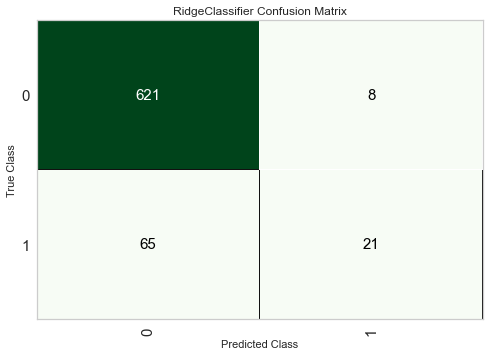

In [18]:
plot_model(tuned_ridge, 'confusion_matrix')

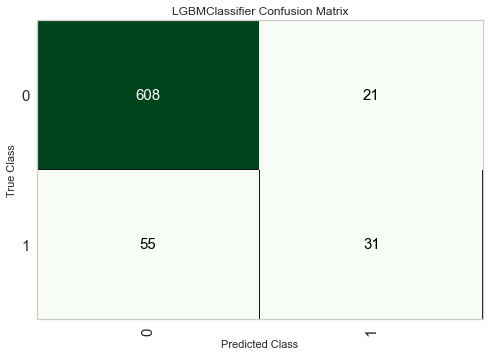

In [20]:
plot_model(tuned_lightgbm, 'confusion_matrix')

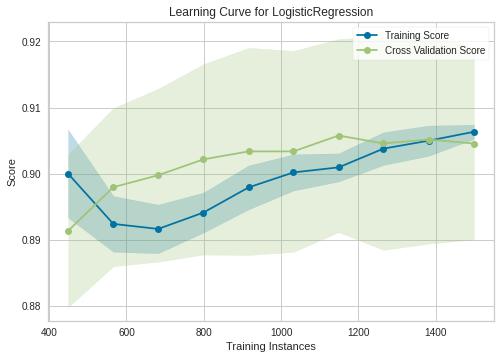

In [20]:
plot_model(lr, 'learning')

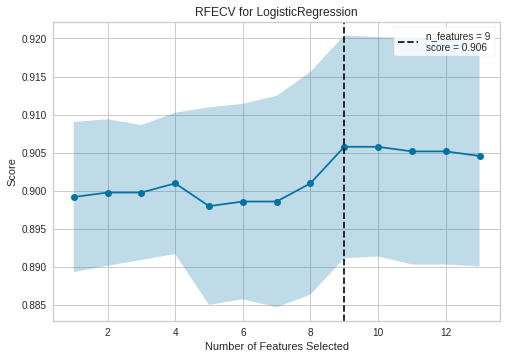

In [22]:
plot_model(lr, 'rfe')

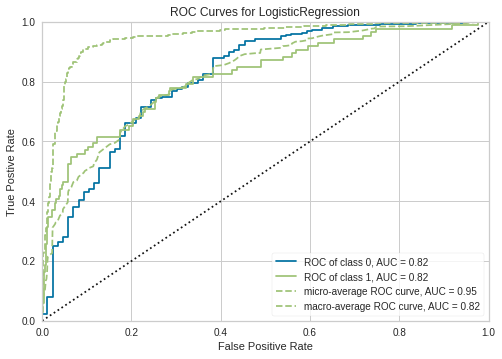

In [23]:
plot_model(lr, 'auc')

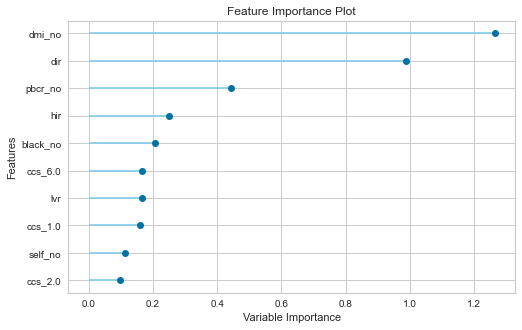

In [19]:
plot_model(tuned_ridge, 'feature')

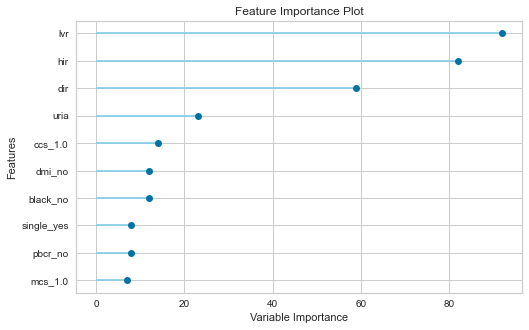

In [21]:
plot_model(tuned_lightgbm, 'feature')

In [31]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

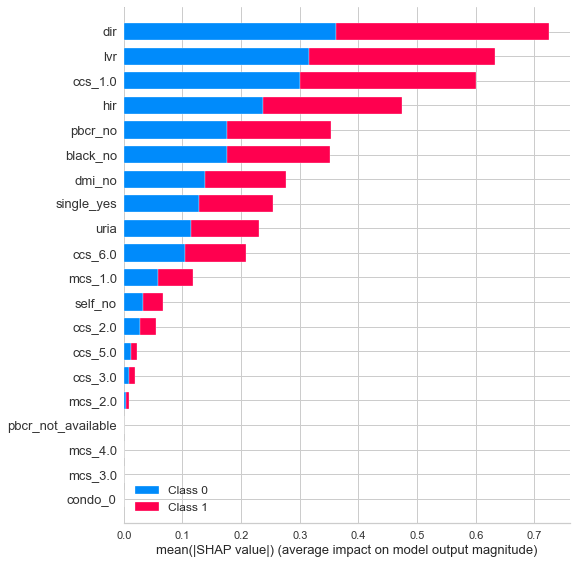

In [43]:
interpret_model(tuned_lightgbm)

In [36]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10)

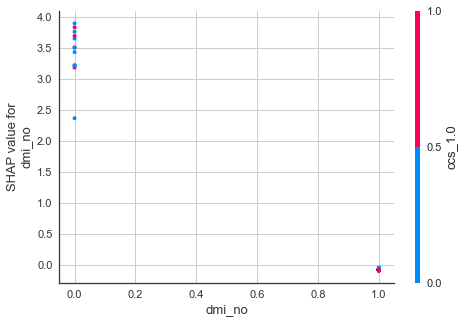

In [49]:
interpret_model(tuned_lightgbm, plot = 'correlation', feature = 'dmi_no')

In [42]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10)

In [27]:
pred_holdout = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8937,0.8072,0.3605,0.5962,0.4493,0.3944


In [28]:
pred_holdout = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.8979,0,0.2442,0.7241,0.3652,0.3242


In [29]:
calibrated_dt = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8922,0.7937,0.1000,1.0000,0.1818,0.1636
1,0.8922,0.8946,0.2000,0.6667,0.3077,0.2672
2,0.9222,0.8939,0.4000,0.8889,0.5517,0.5157
3,0.8563,0.7794,0.1000,0.2500,0.1429,0.0799
4,0.8982,0.8823,0.1500,1.0000,0.2609,0.2370
5,0.9222,0.8230,0.4000,0.8889,0.5517,0.5157
6,0.9157,0.8877,0.3000,1.0000,0.4615,0.4298
7,0.8795,0.7296,0.1000,0.5000,0.1667,0.1318
8,0.9036,0.9267,0.2500,0.8333,0.3846,0.3484
9,0.9157,0.8833,0.3158,0.8571,0.4615,0.4262


In [0]:
lr_final = finalize_model(lr)